In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
import sys 
import os
sys.path.append(os.path.abspath(os.path.join("../Scripts")))

In [81]:
from EDA import univariate_analysis, ipAddress_conversion,find_country_for_ip

In [82]:
creditcard_df = pd.read_csv("../Data/creditcard.csv")
fraud_df = pd.read_csv("../Data/Fraud_Data.csv")
ipAddress_df = pd.read_csv("../Data/IpAddress_to_Country.csv")

In [83]:
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [86]:
fraud_df.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [87]:
fraud_df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [88]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [89]:
ipAddress_df.head(5)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [90]:
ipAddress_df.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [91]:
ipAddress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Missing Values

In [92]:
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

### Data Cleaning

In [93]:
fraud_df.duplicated().sum()

0

In [94]:
# Remove duplicates
fraud_df.drop_duplicates(inplace=True)

In [95]:
# Correcting data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

### Exploratory Data Analysis

### Univariate Analysis

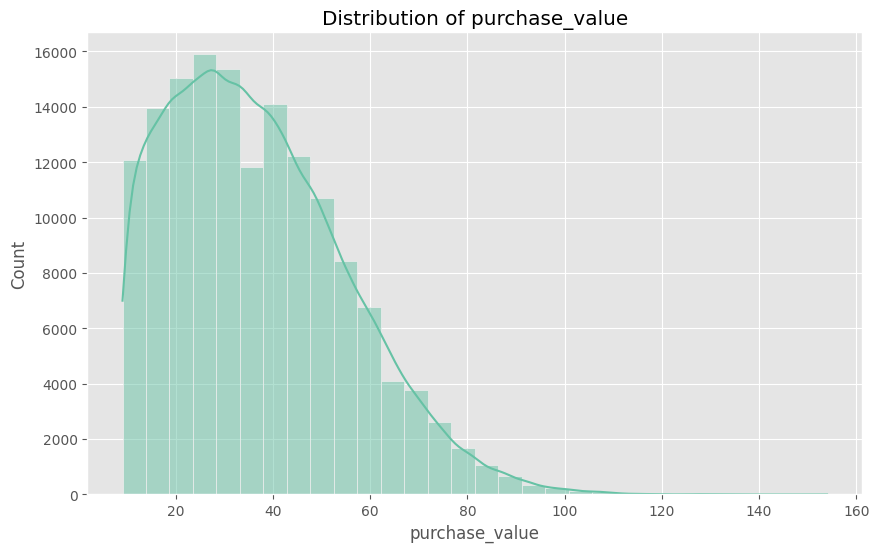

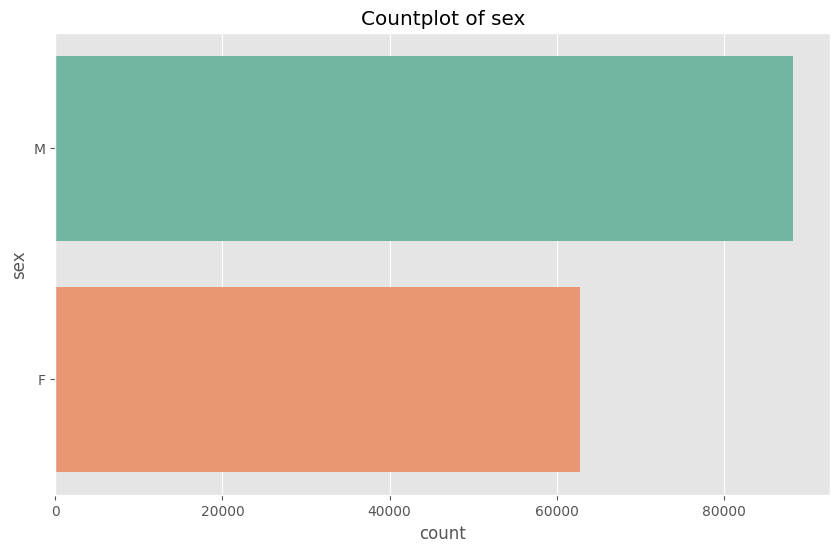

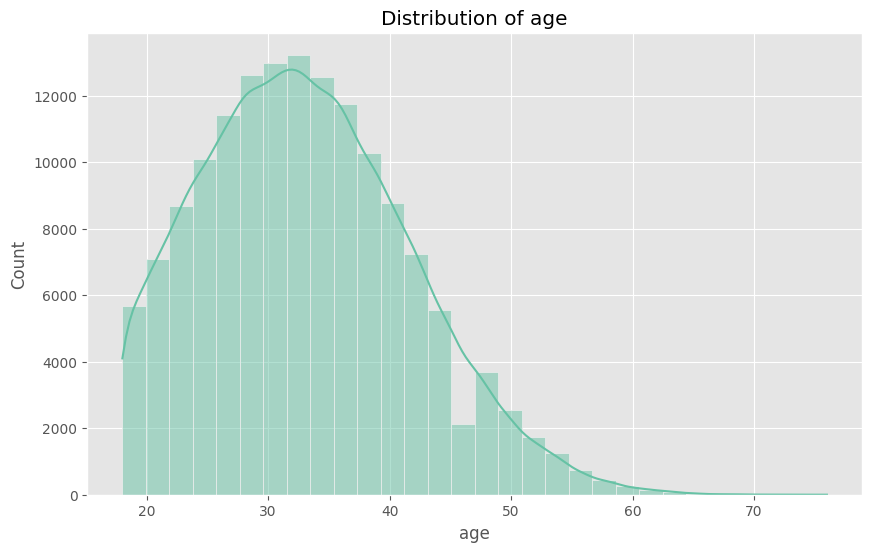

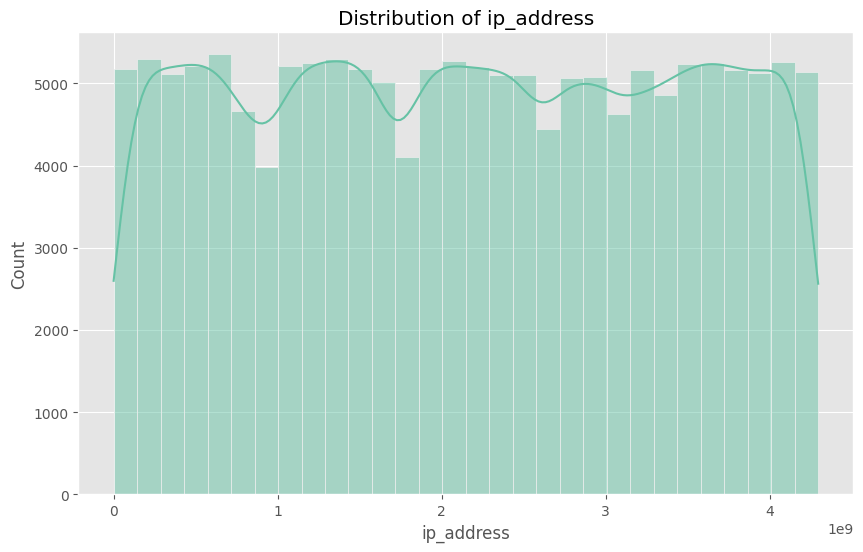

In [96]:
# Analyze each column
for col in ['purchase_value','sex', 'age', 'ip_address']:
    univariate_analysis(fraud_df, col)

### Bivariate Analysis

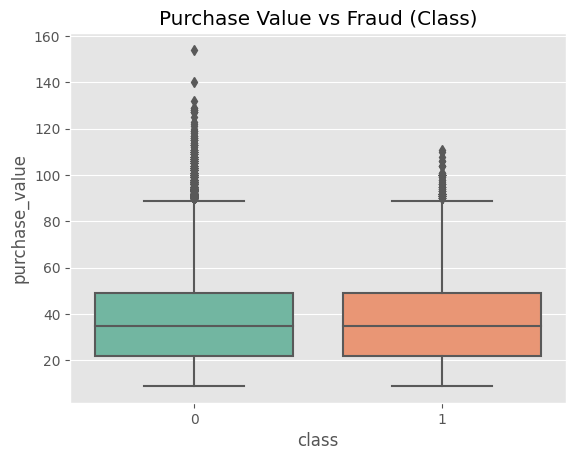

In [97]:
# Example: Correlation between purchase value and fraud
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value vs Fraud (Class)')
plt.show()

### Merge Datasets for Geolocation Analysis

In [98]:
fraud_df.shape

(151112, 11)

In [99]:
# Convert lower_bound_ip_address to int
ipAddress_df['lower_bound_ip_address'] = ipAddress_df['lower_bound_ip_address'].fillna(0).astype(int)
ipAddress_df['upper_bound_ip_address'] = ipAddress_df['upper_bound_ip_address'].fillna(0).astype(int)

# Filter out invalid IP addresses (e.g., negative values)
fraud_df = fraud_df[fraud_df['ip_address'] > 0]  # Keep only positive integer IPs

# Apply the function to fraud_df to find the country for each IP
fraud_df['country'] = fraud_df['ip_address'].apply(lambda ip: find_country_for_ip(ip, ipAddress_df))

# Display the merged result with the country
print(fraud_df[['ip_address', 'country']].head())


     ip_address        country
0  7.327584e+08          Japan
1  3.503114e+08  United States
2  2.621474e+09        Unknown
3  3.840542e+09        Unknown
4  4.155831e+08  United States


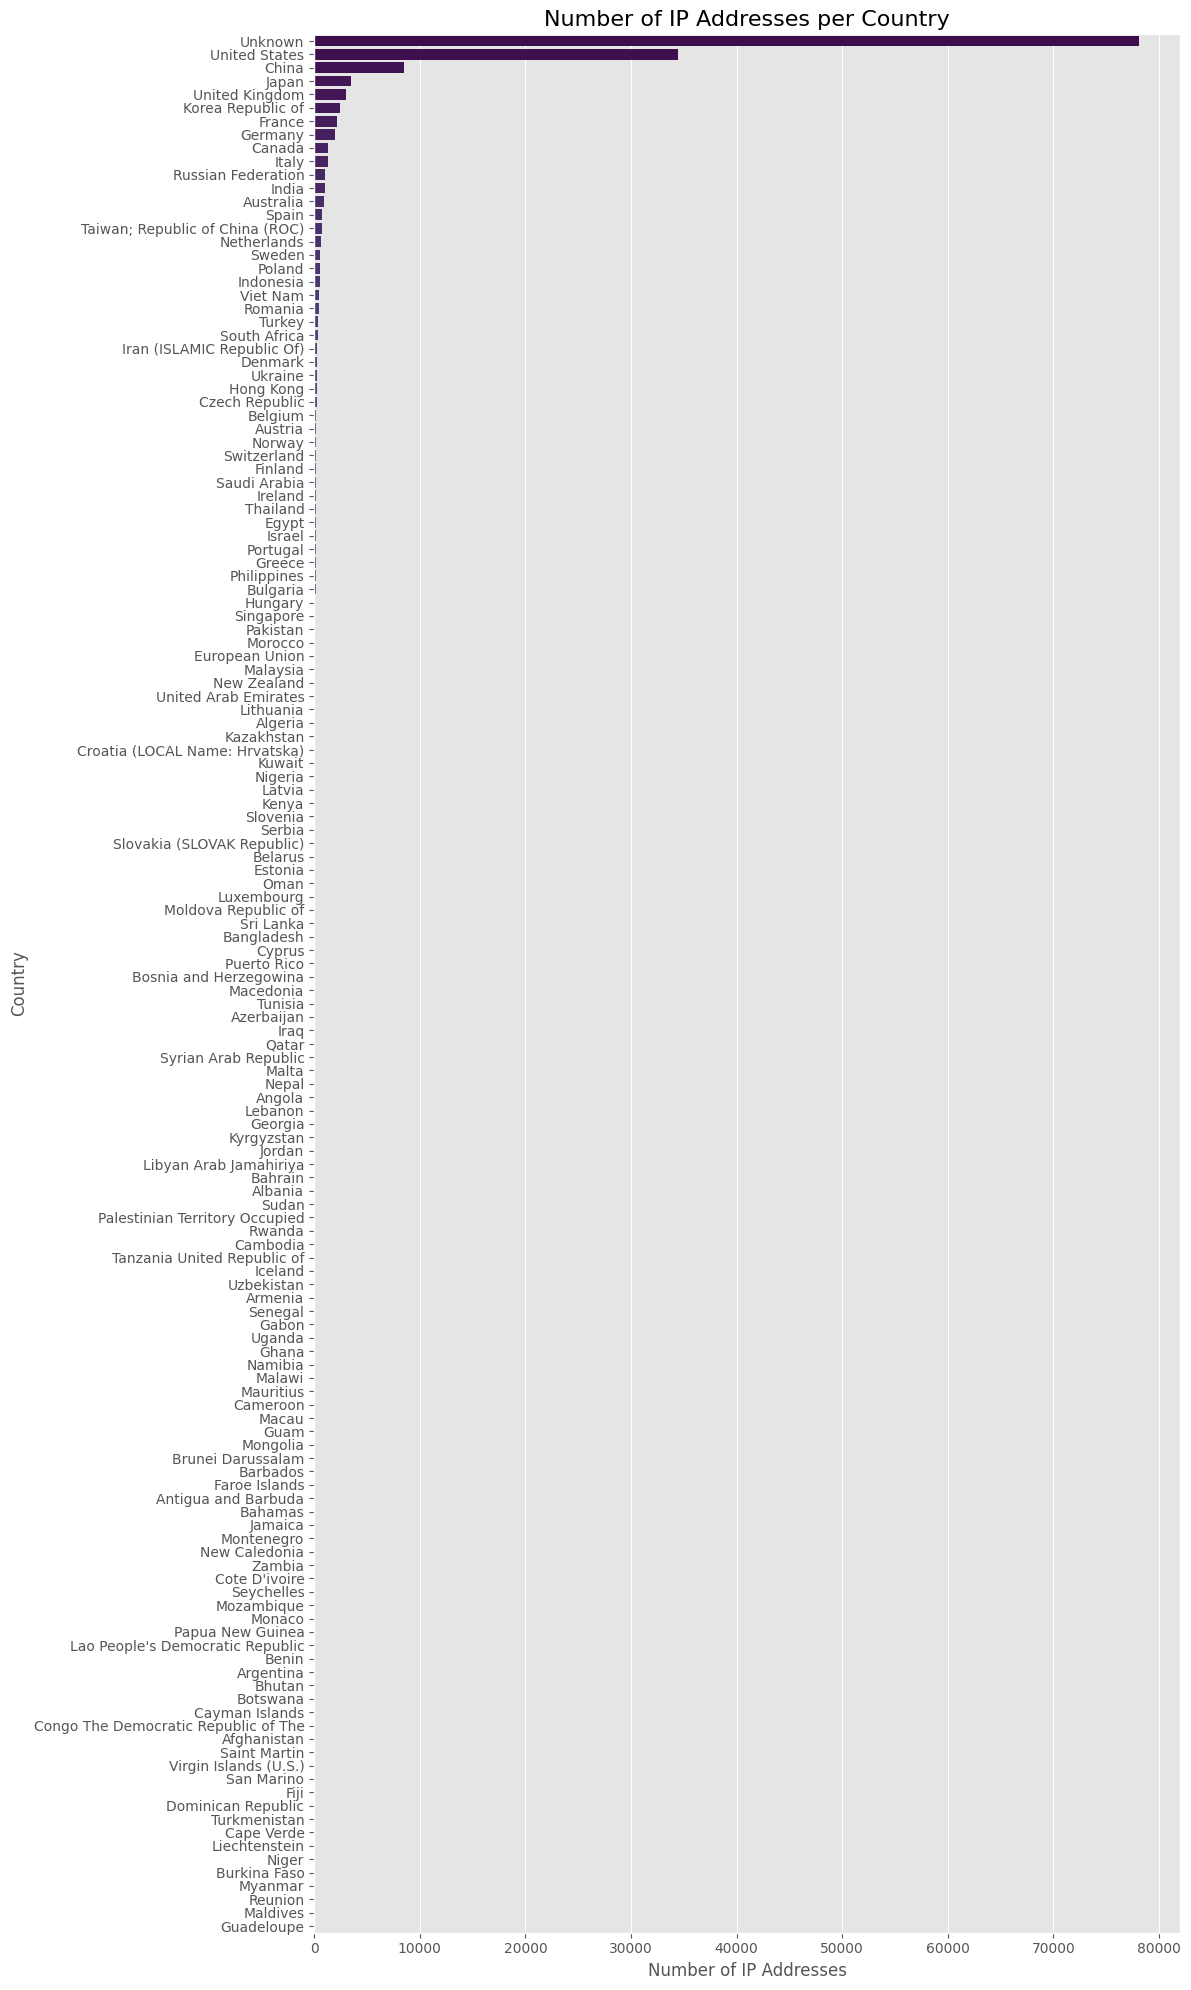

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences for each country
country_counts = fraud_df['country'].value_counts()

# Set up the plot
plt.figure(figsize=(12, 20))  # Increase height for better readability
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis')

# Add labels and title
plt.title('Number of IP Addresses per Country', fontsize=16)
plt.xlabel('Number of IP Addresses', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [101]:
fraud_df[fraud_df['country'] != 'NaN'].shape

(151112, 12)

In [102]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 13.8+ MB


## Feature Engineering

In [103]:
# Frequency and velocity
fraud_df['transaction_count'] = fraud_df.groupby('user_id')['user_id'].transform('count')
fraud_df['transaction_velocity'] = fraud_df.groupby('user_id')['purchase_time'].diff().dt.seconds.fillna(0)
# print(f"transaction count {fraud_df['transaction_count']} transaction velocity {fraud_df['transaction_velocity']}")

In [104]:
# Time-based features
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

## Normalization and Scaling

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_df[['purchase_value', 'transaction_count']] = scaler.fit_transform(fraud_df[['purchase_value', 'transaction_count']])

### Encoding Categorical Features

In [106]:
# Encoding categorical features
fraud_df = pd.get_dummies(fraud_df, columns=['browser', 'source', 'sex'], drop_first=True)

In [107]:
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,transaction_count,transaction_velocity,hour_of_day,day_of_week,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,39,7.327584e+08,0,Japan,0.0,0.0,2,5,False,False,False,False,False,True,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,53,3.503114e+08,0,United States,0.0,0.0,1,0,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,53,2.621474e+09,1,Unknown,0.0,0.0,18,3,False,False,True,False,False,True,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,41,3.840542e+09,0,Unknown,0.0,0.0,13,0,False,False,False,True,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,45,4.155831e+08,0,United States,0.0,0.0,18,2,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,28,3.451155e+09,1,Unknown,0.0,0.0,0,6,False,False,False,False,False,True,True
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,32,2.439047e+09,0,Unknown,0.0,0.0,12,1,False,False,False,True,False,True,True
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,26,2.748471e+09,0,Unknown,0.0,0.0,7,2,False,True,False,False,False,True,False
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,37,3.601175e+09,0,Unknown,0.0,0.0,9,0,False,False,False,False,False,True,True


In [108]:
fraud_df.to_csv("fraud_dataset.csv" , index=False)